In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
#import data visualization library
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [3]:
#for read stock information from yahoo
from pandas_datareader import DataReader, wb

In [4]:
#for time stamps
from datetime import datetime

In [36]:
#for division
from __future__ import division

In [5]:
#the list of tech stock to analyze
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [6]:
#set the start and end time
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [7]:
#grab yahoo finance data and setting as a dataframe
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    

In [8]:
#check the first five rows of AAPL data
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-25,120.419998,122.099998,120.279999,121.879997,119.951073,32377600
2017-01-26,121.669998,122.440002,121.599998,121.940002,120.010132,26337600
2017-01-27,122.139999,122.349998,121.599998,121.949997,120.019958,20562900
2017-01-30,120.930000,121.629997,120.660004,121.629997,119.705017,30377500
2017-01-31,121.150002,121.389999,120.620003,121.349998,119.429459,49201000


In [9]:
#statistics of the data summary
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,154.015810,155.005969,153.009091,154.094506,153.173619,2.725755e+07
std,13.547614,13.639114,13.345113,13.462571,14.036442,1.138690e+07
min,120.419998,121.389999,120.279999,121.349998,119.429459,1.402670e+07
25%,143.729996,144.500000,143.160004,143.729996,142.266235,2.035000e+07
50%,153.899994,154.570007,153.029999,153.869995,152.798523,2.440950e+07
75%,163.639999,163.960007,160.559998,163.050003,162.465958,3.037940e+07
max,179.369995,180.100006,178.250000,179.259995,179.259995,1.119850e+08


In [10]:
#get the stock information
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2017-01-25 to 2018-01-25
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Adj Close    253 non-null float64
Volume       253 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


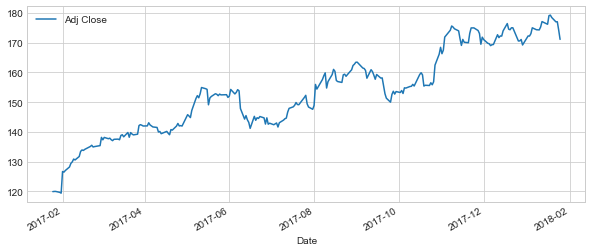

In [11]:
#visualizing the closing price of AAPL stock in the last year
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

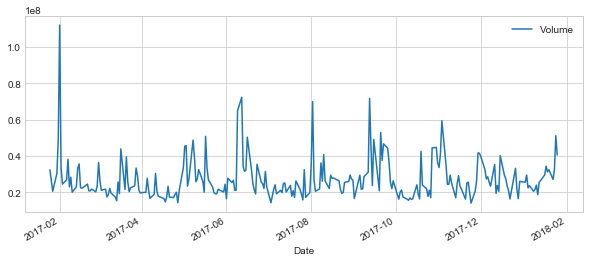

In [12]:
#viusalize the volume traded each day
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [13]:
#moving average
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-25,120.419998,122.099998,120.279999,121.879997,119.951073,32377600
2017-01-26,121.669998,122.440002,121.599998,121.940002,120.010132,26337600
2017-01-27,122.139999,122.349998,121.599998,121.949997,120.019958,20562900
2017-01-30,120.930000,121.629997,120.660004,121.629997,119.705017,30377500
2017-01-31,121.150002,121.389999,120.620003,121.349998,119.429459,49201000


A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations.

In [14]:
# 
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  after removing the cwd from sys.path.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  after removing the cwd from sys.path.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  after removing the cwd from sys.path.


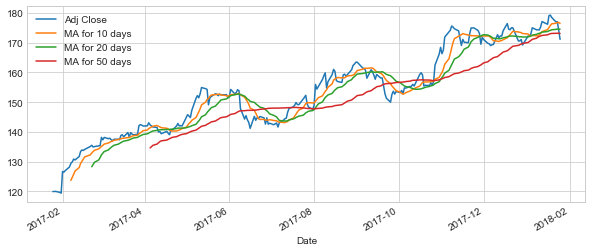

In [15]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

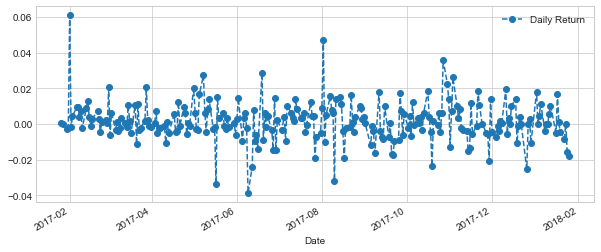

In [16]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

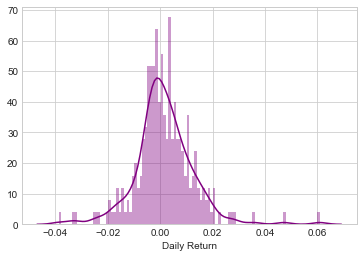

In [17]:
#distplot allow two plot on top of each other
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'purple')

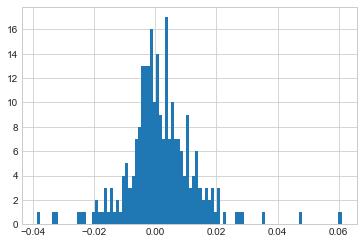

In [18]:
AAPL['Daily Return'].hist(bins=100)

In [19]:
#analyze all the stocks on the list
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [21]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-01-25,171.110001,1377.949951,1170.369995,92.330002
2018-01-24,174.220001,1357.510010,1164.239990,91.820000
2018-01-23,177.039993,1362.540039,1169.969971,91.900002
2018-01-22,177.000000,1327.310059,1155.810059,91.610001
2018-01-19,178.460007,1294.579956,1137.510010,90.000000


In [22]:
tech_rets = closing_df.pct_change()

In [23]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-01-25,NaN,NaN,NaN,NaN
2018-01-24,0.018175,-0.014834,-0.005238,-0.005524
2018-01-23,0.016186,0.003705,0.004922,0.000871
2018-01-22,-0.000226,-0.025856,-0.012103,-0.003156
2018-01-19,0.008249,-0.024659,-0.015833,-0.017575


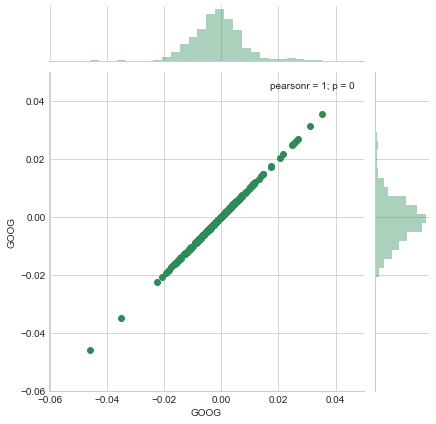

In [24]:
sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter',color='seagreen')

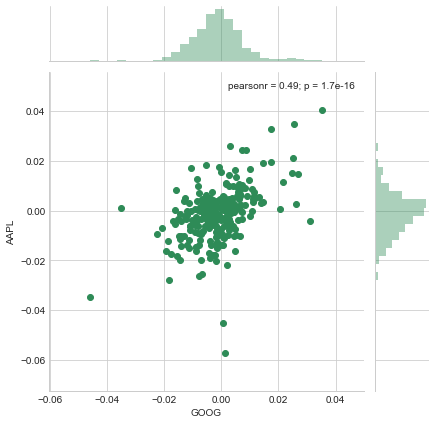

In [25]:
sns.jointplot('GOOG','AAPL',tech_rets,kind = 'scatter',color='seagreen')

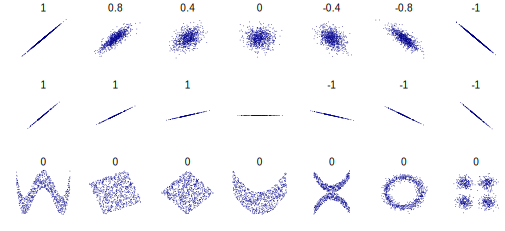

In [61]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

In [62]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-01-18,NaN,NaN,NaN,NaN
2018-01-17,-0.000892,0.001299,0.001938,0.000444
2018-01-16,-0.016248,0.007614,-0.009028,-0.019858
2018-01-12,0.005108,0.000261,0.000446,0.014148
2018-01-11,-0.010221,-0.021851,-0.014916,-0.016964


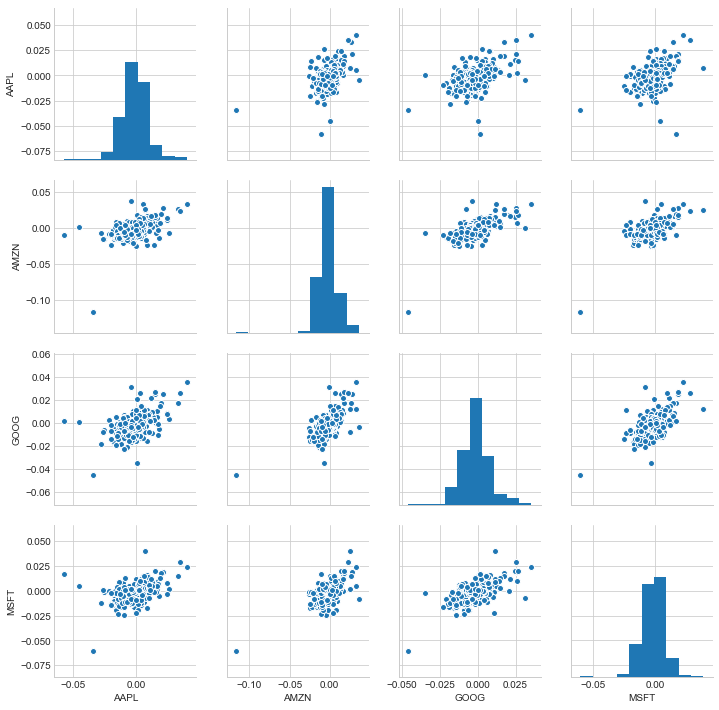

In [26]:
sns.pairplot(tech_rets.dropna())

/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


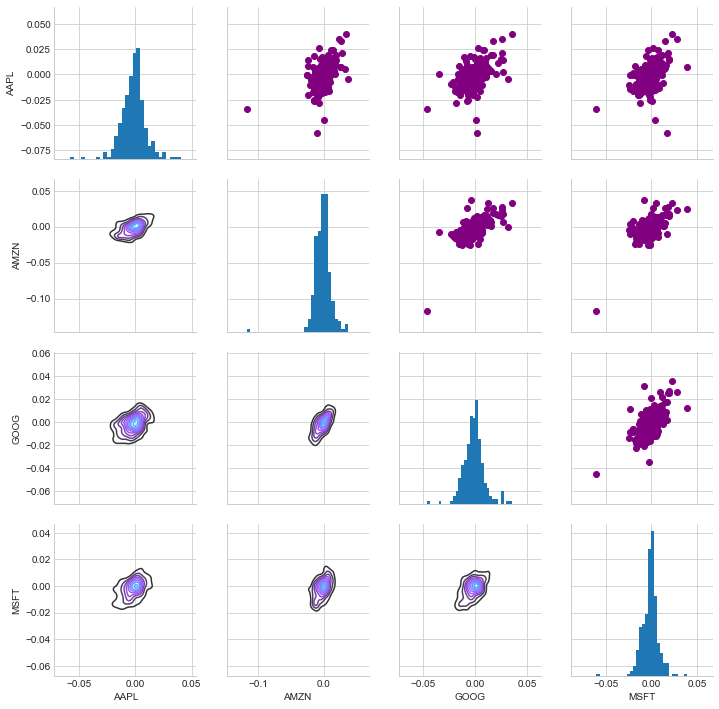

In [27]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)


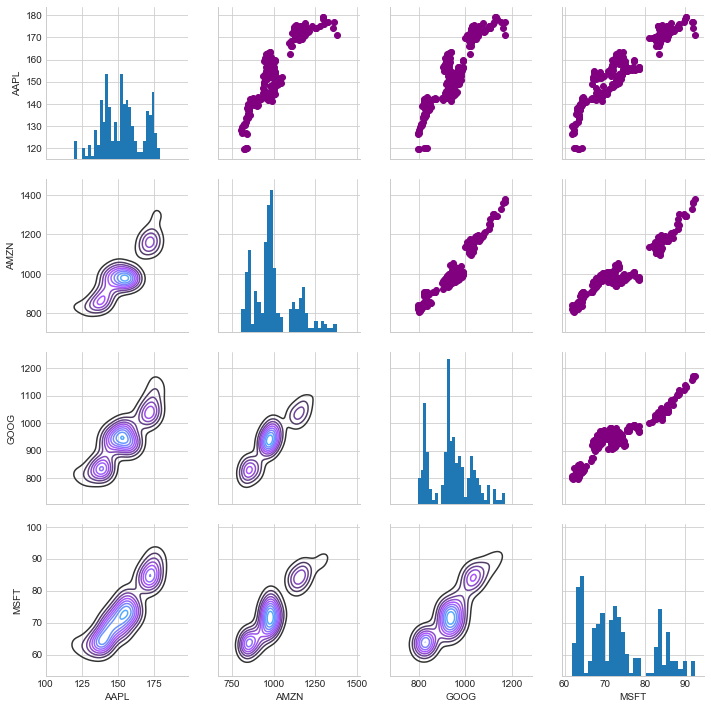

In [28]:
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

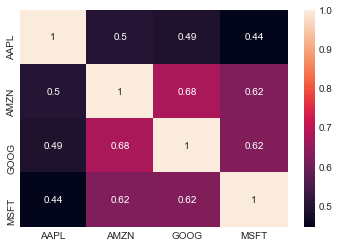

In [30]:
sns.heatmap(tech_rets.dropna().corr(),annot=True)

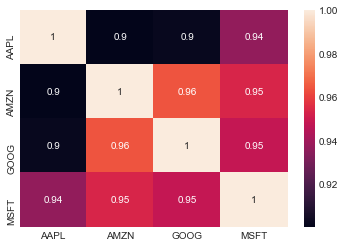

In [31]:
sns.heatmap(closing_df.dropna().corr(),annot=True)

In [32]:
#risk analysis
rets = tech_rets.dropna()

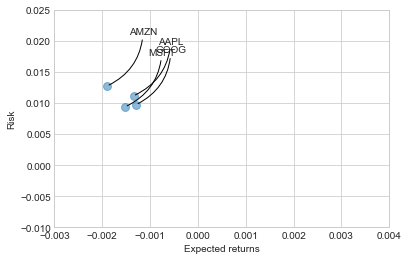

In [34]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([-0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

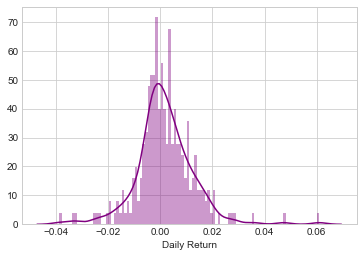

In [76]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [77]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-01-17,-0.000892,0.001299,0.001938,0.000444
2018-01-16,-0.016248,0.007614,-0.009028,-0.019858
2018-01-12,0.005108,0.000261,0.000446,0.014148
2018-01-11,-0.010221,-0.021851,-0.014916,-0.016964
2018-01-10,-0.005648,-0.017506,-0.002632,-0.002952


In [44]:
rets['AAPL'].quantile(0.05)

-0.017908164168199542

In [45]:
days = 365

dt =1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [46]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
    return price
    

In [38]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-25,829.619995,835.770020,825.059998,835.669983,835.669983,1494500
2017-01-26,837.809998,838.000000,827.010010,832.150024,832.150024,2973900
2017-01-27,834.710022,841.950012,820.440002,823.309998,823.309998,2965800
2017-01-30,814.659973,815.840027,799.799988,802.320007,802.320007,3246600
2017-01-31,796.859985,801.250000,790.520020,796.789978,796.789978,2160600


Text(0.5,1,u'Monte Carlo Analysis for Google')

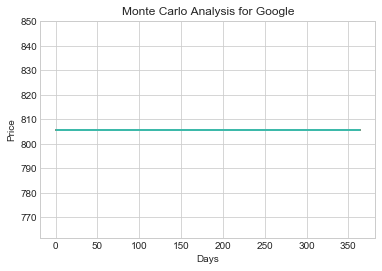

In [47]:
start_price=805.81
for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [86]:
runs = 10000
simulations = np.zeros(runs)
for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]


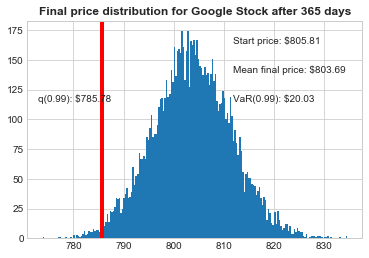

In [87]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');